In [ ]:
#!pip install pandas numpy matplotlib seaborn scikit-learn plotly plotly_express scipy

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)

   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### <center> Configuraciones <center>

In [6]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 12

### <center> Carga de data <center>

In [7]:
df = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\PERFORMANCE\student_habits_performance.csv')

In [8]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [11]:
df['internet_quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [24]:
# crear una funcion que selecciones las columnas que son objeto y nos devuelva los valores unicos que tiene cada uno de ellas

def valores_unicos(df, cols):
    for col in cols:
        if df[col].dtype == 'object':
            print(f'Columna: {col}')
            print(f'Valores unicos: {df[col].unique()}')
            print('-------------------')

valores_unicos(df, df.columns[1:])

Columna: gender
Valores unicos: ['Female' 'Male' 'Other']
-------------------
Columna: part_time_job
Valores unicos: ['No' 'Yes']
-------------------
Columna: diet_quality
Valores unicos: ['Fair' 'Good' 'Poor']
-------------------
Columna: parental_education_level
Valores unicos: ['Master' 'High School' 'Bachelor' nan]
-------------------
Columna: internet_quality
Valores unicos: ['Average' 'Poor' 'Good']
-------------------
Columna: extracurricular_participation
Valores unicos: ['Yes' 'No']
-------------------


In [25]:
# crear una funcion que selecciones las columnas que son objeto y nos devuelva el conteo de los valores unicos que tiene cada uno de ellas

def conteo_valores_unicos(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'Columna: {col}')
            print(f'Conteo de valores unicos: {df[col].value_counts()}')
            print('-------------------')

print(conteo_valores_unicos(df))

Columna: student_id
Conteo de valores unicos: student_id
S1999    1
S1000    1
S1001    1
S1002    1
S1003    1
        ..
S1012    1
S1011    1
S1010    1
S1009    1
S1008    1
Name: count, Length: 1000, dtype: int64
-------------------
Columna: gender
Conteo de valores unicos: gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
-------------------
Columna: part_time_job
Conteo de valores unicos: part_time_job
No     785
Yes    215
Name: count, dtype: int64
-------------------
Columna: diet_quality
Conteo de valores unicos: diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
-------------------
Columna: parental_education_level
Conteo de valores unicos: parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
-------------------
Columna: internet_quality
Conteo de valores unicos: internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
-------------------
Col

### cambiar los valores nan a sin datos en parental_education_level

In [12]:
df.isnull().sum() / len(df) * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         9.1
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

In [ ]:
# df['parental_education_level'] = df['parental_education_level'].fillna('sin_datos')
df['parental_education_level'].fillna('sin_datos', inplace=True)

In [29]:
df.duplicated().sum()

np.int64(0)

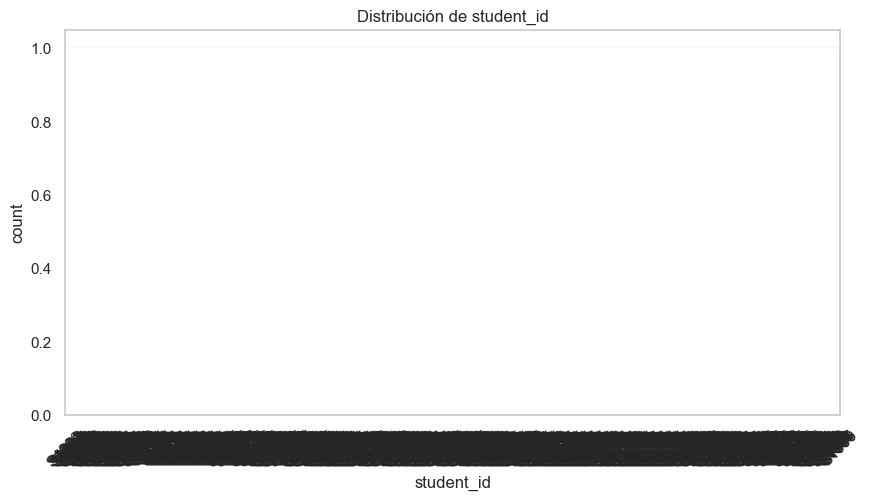

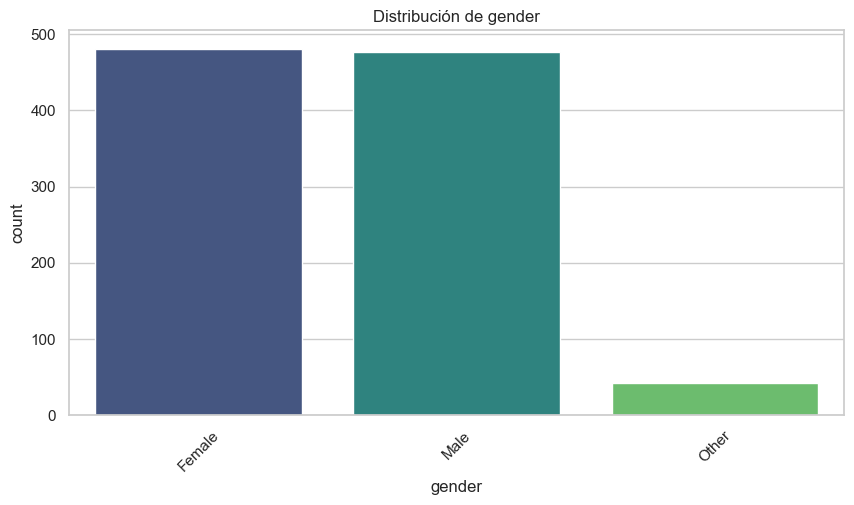

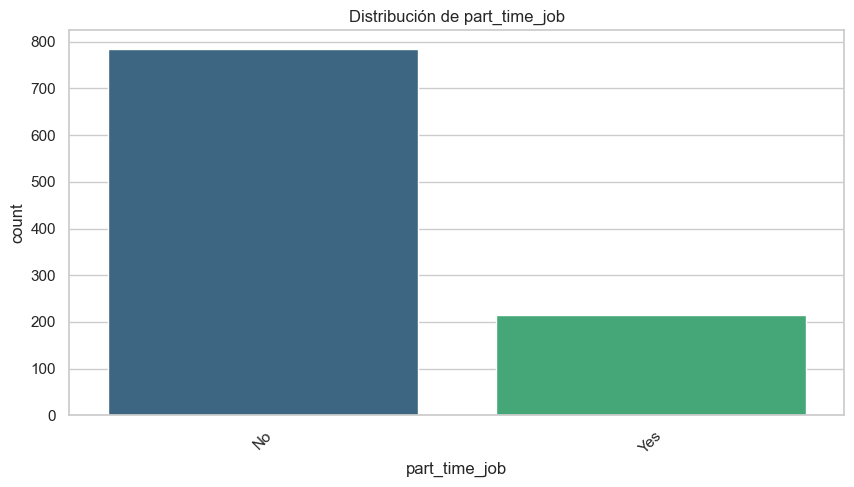

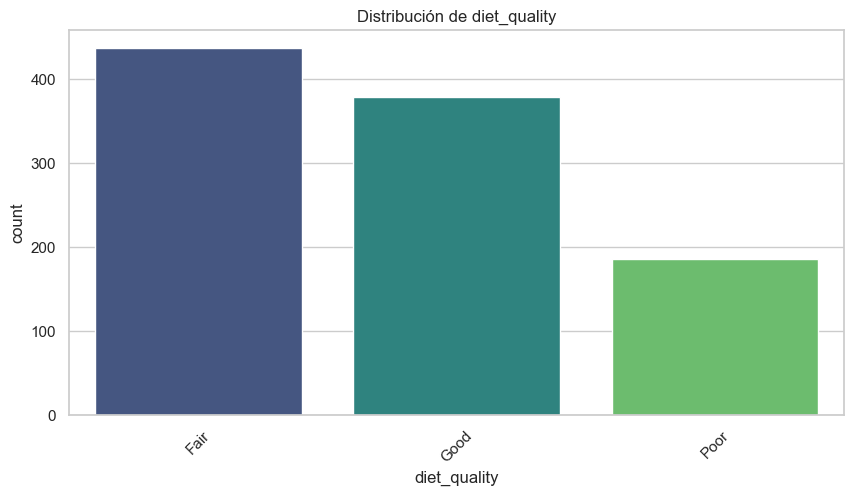

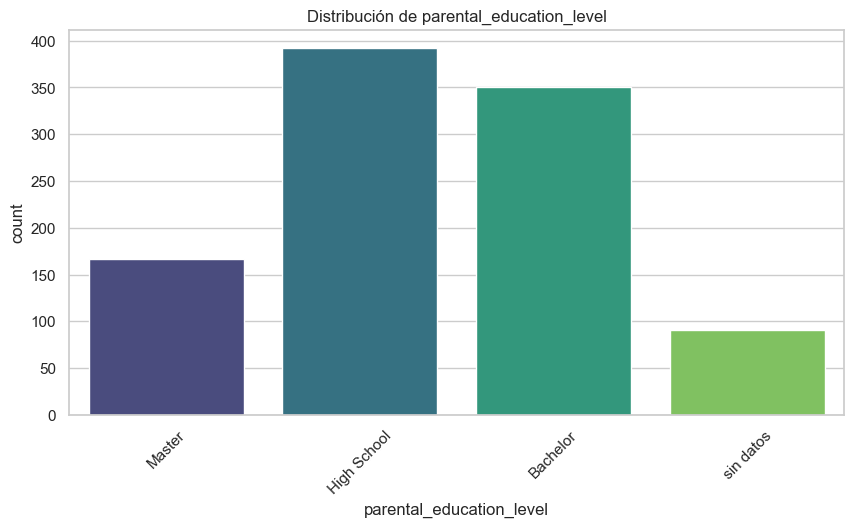

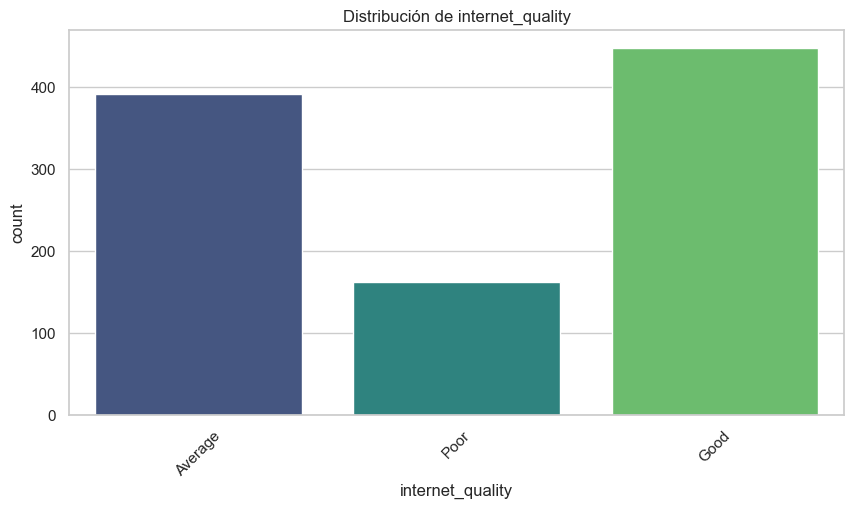

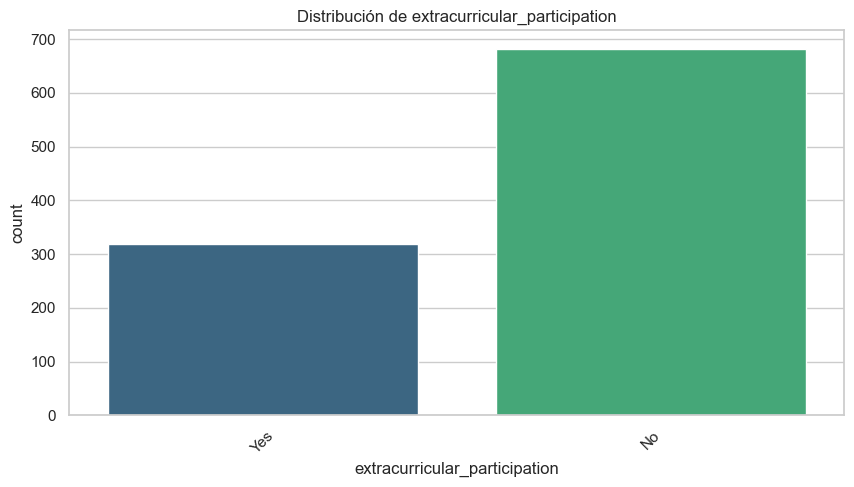

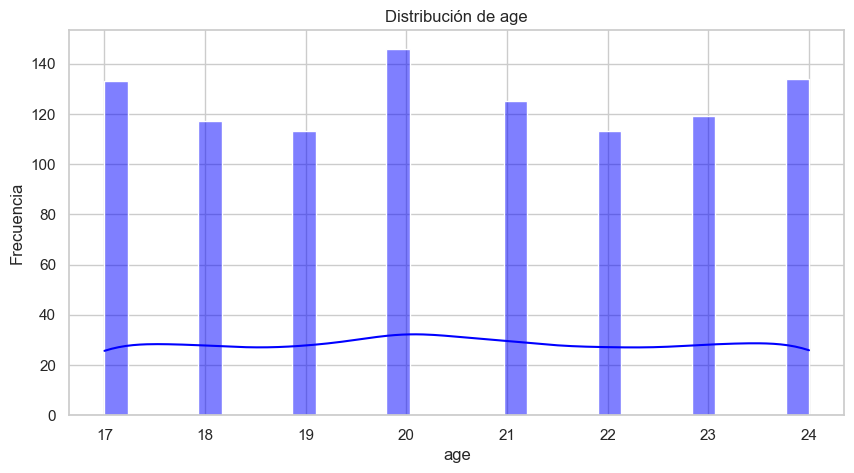

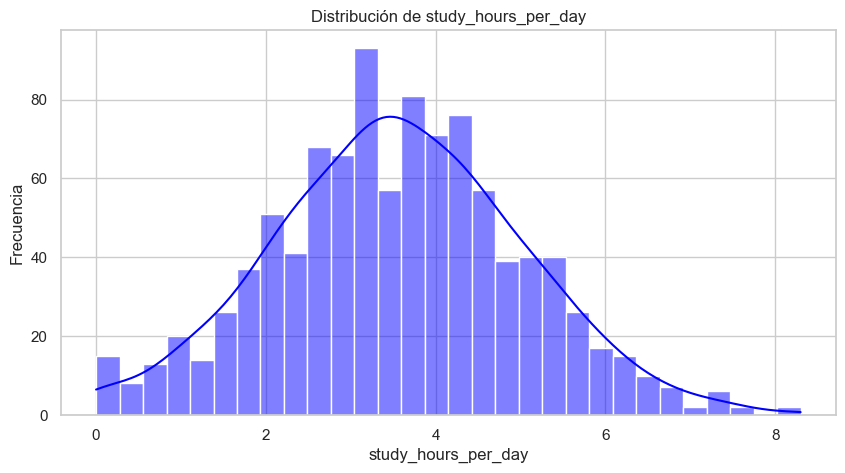

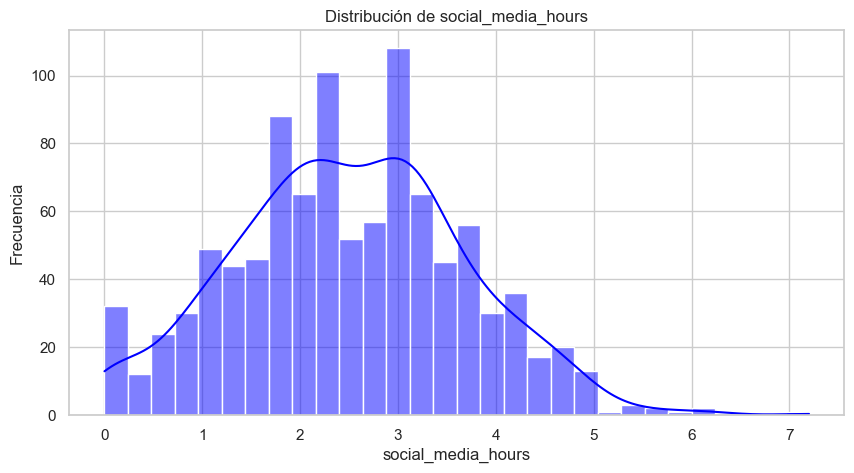

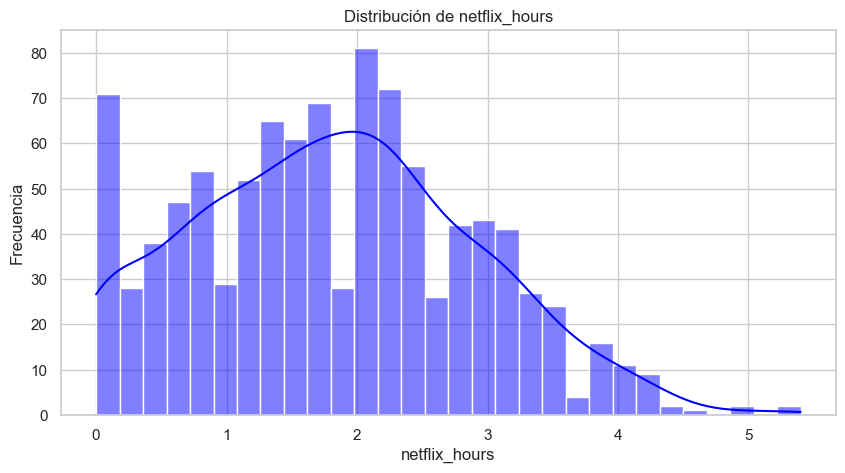

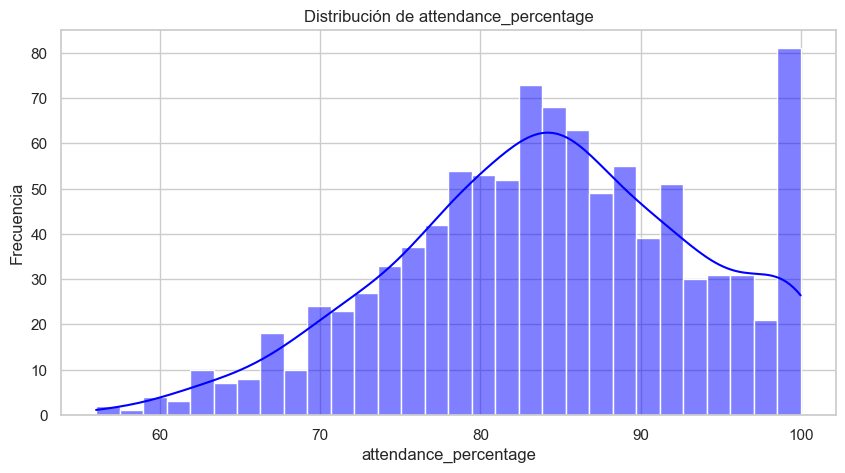

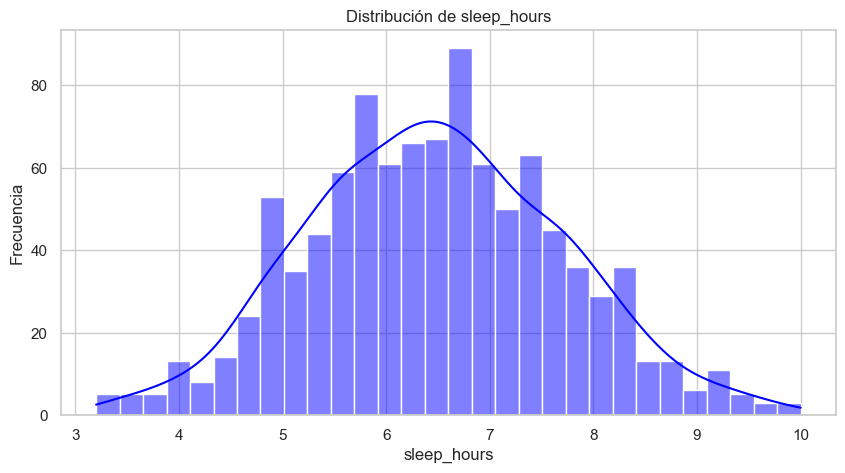

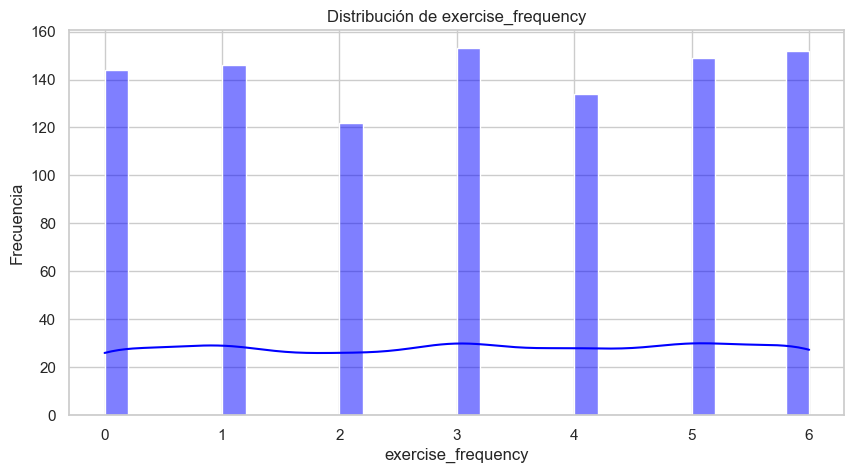

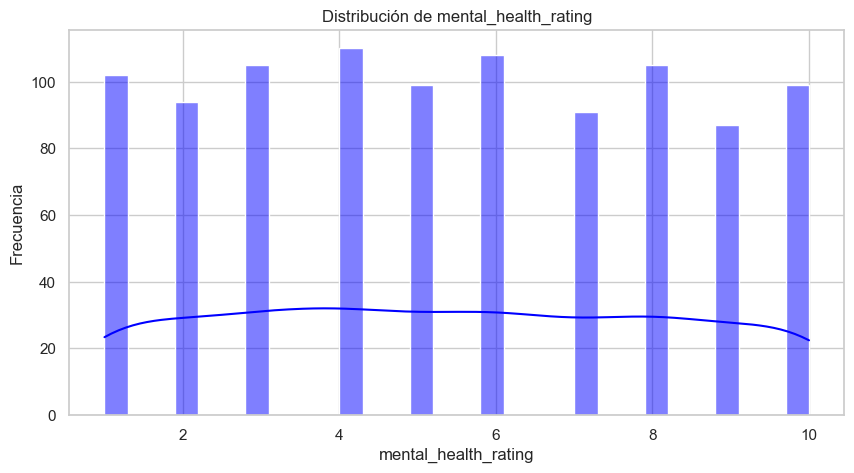

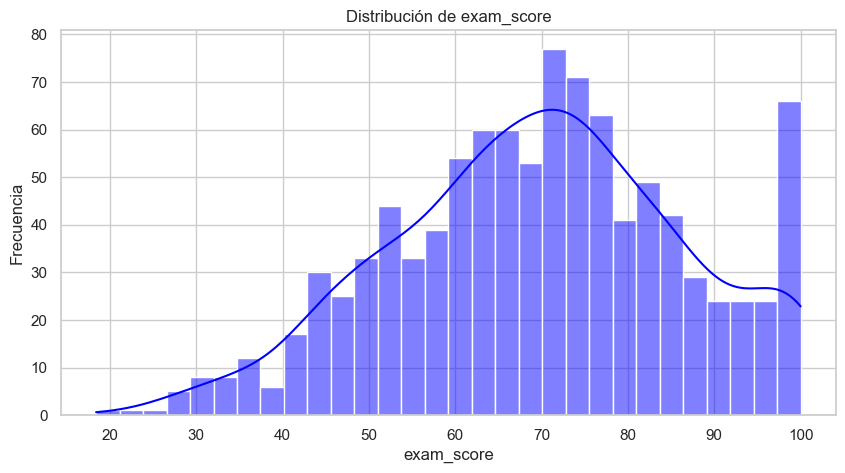

In [28]:
def plot_categorical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_numerical_distribution(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in categorical_cols:
    plot_categorical_distribution(df, col)
for col in numerical_cols:
    plot_numerical_distribution(df, col)

# <center> EDA <center>

### Análisis bivariado

In [35]:
# Relación entre horas de estudio y calificaciones
esudio_calificaciones = df.groupby('study_hours_per_day')['exam_score'].agg(['count', 'mean', 'std']).reset_index()
esudio_calificaciones

,study_hours_per_day,count,mean,std
0,0.0,13,40.807692,11.682142
1,0.1,1,53.400000,NaN
2,0.2,1,31.500000,NaN
3,0.3,4,32.625000,4.035158
4,0.5,4,39.525000,6.741600
...,...,...,...,...
73,7.4,3,99.233333,1.327906
74,7.5,1,100.000000,NaN
75,7.6,1,100.000000,NaN
76,8.2,1,100.000000,NaN


### Correlaciones

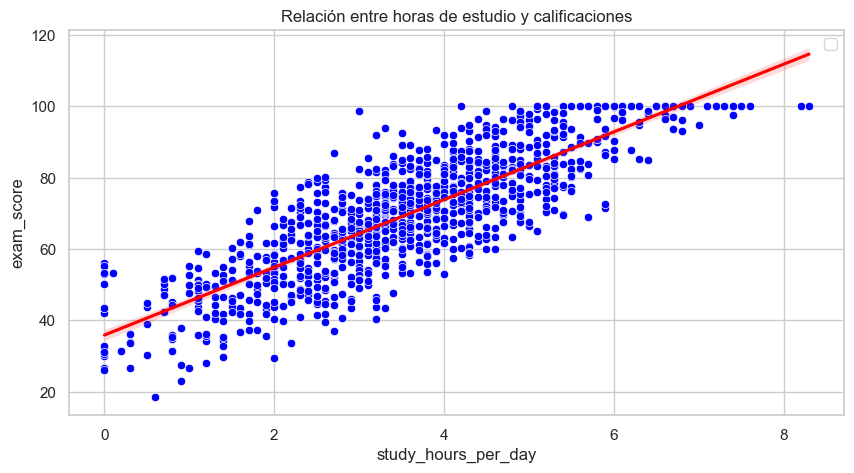

In [41]:
def correlacion(df, study_hours, exam_score):
    correlation = df[study_hours].corr(df[exam_score])
    return correlation
correlacion(df, 'study_hours_per_day', 'exam_score')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', color='blue')
plt.title('Relación entre horas de estudio y calificaciones')
plt.xlabel('Horas de estudio por día')
plt.ylabel('Calificaciones')
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter=False, color='red')
plt.legend()
plt.show()
# Relación entre horas de estudio y calificaciones

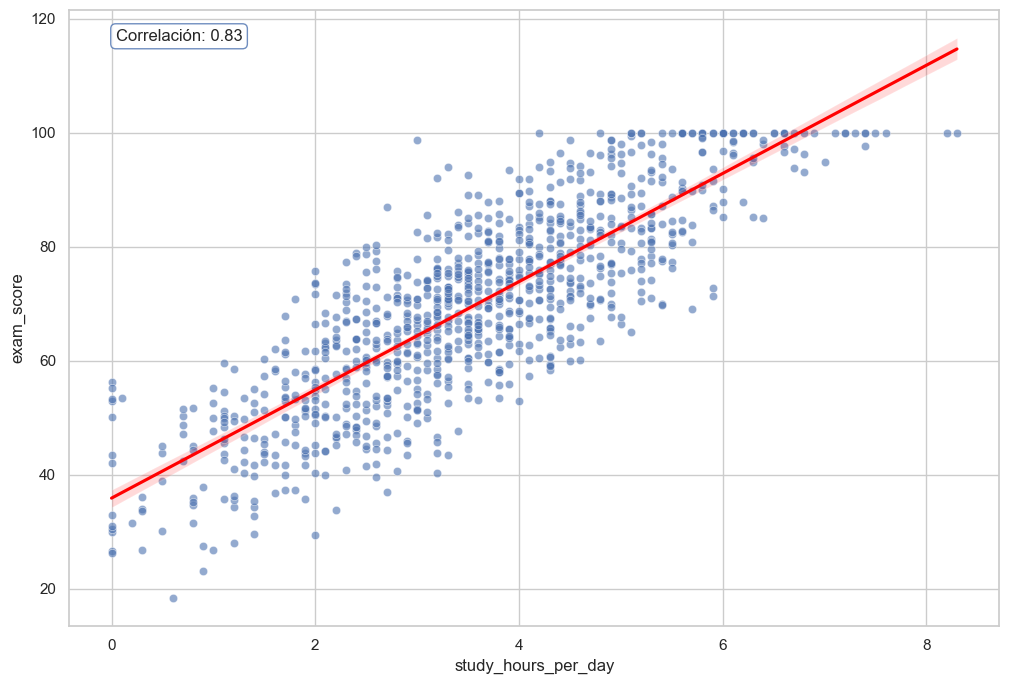

'\nLa función plt.annotate se utiliza para agregar una anotación en el gráfico. \nEl texto de la anotación es una cadena formateada (f\'Correlación: {corr:.2f}\'), \nque incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor \nse calcula previamente con el método .corr() de pandas, que mide la relación lineal \nentre las dos columnas del DataFrame.\n\nEl parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas \nnormalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda \ny (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación \nse coloque en la parte superior izquierda del gráfico, independientemente de los \nvalores de los datos.\n\nEl argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro \ntiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), \nun borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% \n(a

In [40]:
# Relación entre horas de estudio y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Estudio por Día') 
plt.ylabel('Calificación en Examen')


# línea de regresión
sns.regplot(x='study_hours_per_day', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['study_hours_per_day'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 
'''
La función plt.annotate se utiliza para agregar una anotación en el gráfico. 
El texto de la anotación es una cadena formateada (f'Correlación: {corr:.2f}'), 
que incluye el valor de la correlación (corr) redondeado a dos decimales. Este valor 
se calcula previamente con el método .corr() de pandas, que mide la relación lineal 
entre las dos columnas del DataFrame.

El parámetro xy=(0.05, 0.95) indica la posición de la anotación en coordenadas 
normalizadas del eje (axes fraction), donde (0, 0) es la esquina inferior izquierda 
y (1, 1) es la esquina superior derecha del gráfico. Esto asegura que la anotación 
se coloque en la parte superior izquierda del gráfico, independientemente de los 
valores de los datos.

El argumento bbox define un cuadro alrededor del texto de la anotación. Este cuadro 
tiene un estilo redondeado (boxstyle="round,pad=0.3"), un fondo blanco (fc="white"), 
un borde azul (ec="b"), un grosor de línea de 1 (lw=1) y una transparencia del 80% 
(alpha=0.8). Esto mejora la legibilidad del texto en el gráfico.
'''

In [42]:
# Create an interactive scatter plot
# Create the scatter plot
fig = px.scatter(df,
                 x='study_hours_per_day',
                 y='exam_score',
                 color='parental_education_level',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Study Hours vs Exam Scores by Parental Education Level',
                 labels={
                     'study_hours_per_day': 'Study Hours per Day',
                     'exam_score': 'Exam Score (%)',
                     'parental_education_level': 'Parental Education'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Education Level"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show()
 

### Relación entre horas en redes sociales y calificaciones

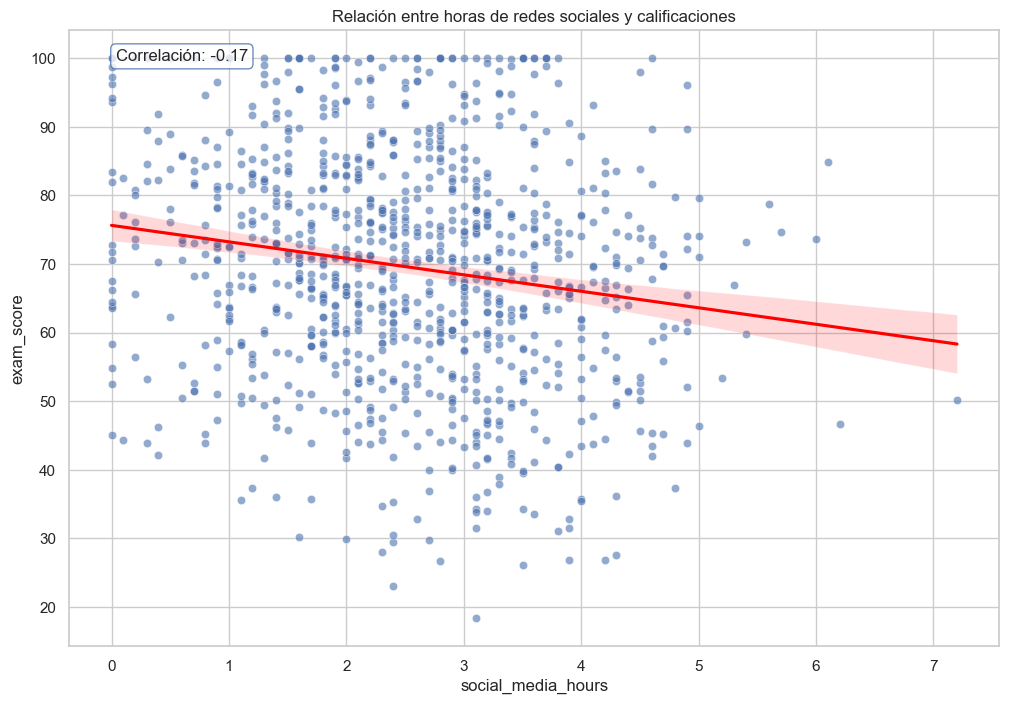

In [46]:
# Relación entre horas de redes sociales y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='social_media_hours', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Redes Sociales por Día')
plt.ylabel('Calificación en Examen')
plt.title('Relación entre horas de redes sociales y calificaciones')

# línea de regresión
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['social_media_hours'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 

In [47]:
correlacion(df, 'social_media_hours', 'exam_score')

np.float64(-0.1667328851086167)

### Relación entre horas de Netflix y calificaciones

In [ ]:
fig = px.scatter(df,
                 x='netflix_hours',
                 y='exam_score',
                 color='exam_score',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Netflix Hours vs Exam Scores',
                 labels={
                     'netflix_hours': 'Netflix hours',
                     'exam_score': 'Exam Score (%)',
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['netflix_hours'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Netflix Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%"
    ])
)
 
fig.show()

In [49]:
print(correlacion(df, 'netflix_hours', 'exam_score'))

-0.17177923845531576


### Relación entre horas de sueño y calificaciones

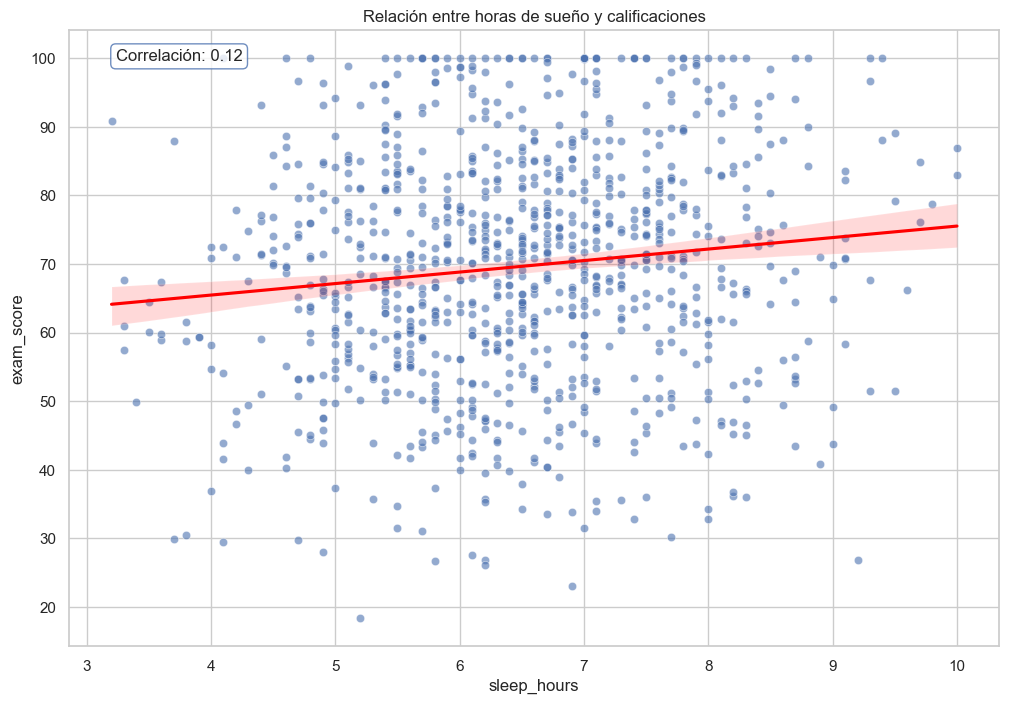

In [54]:
# Relación entre horas de sueño y calificaciones
plt.figure(figsize=(12, 8)) # configuramos el tamaño de la figura
sns.scatterplot(x='sleep_hours', y='exam_score', data=df, alpha=0.6) # alpha es la transparencia del punto
plt.xlabel('Horas de Sueño')
plt.ylabel('Calificación en Examen')
plt.title('Relación entre horas de sueño y calificaciones')

# línea de regresión
sns.regplot(x='sleep_hours', y='exam_score', data=df, scatter=False, color='red') # scatter=False para no dibujar los puntos de nuevo

# correlación
corr = df['sleep_hours'].corr(df['exam_score']) # calculamos la correlación entre las dos variables
plt.annotate(f'Correlación: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',  
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1, alpha=0.8)) # anotamos la correlación en la figura mediante un cuadro 
plt.show() 

In [53]:
correlacion(df, 'sleep_hours', 'exam_score')

np.float64(0.12168291063767982)

In [58]:
fig = px.scatter(df,
                 x='sleep_hours',
                 y='exam_score',
                 color='sleep_hours',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Sleep Hours vs Exam Scores',
                 labels={
                     'sleep_hours': 'Study Hours per Day',
                     'exam_score': 'Exam Score (%)',
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['sleep_hours'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Education Level"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "<extra></extra>"
    ])
)
 
fig.show()

### Compara calificaciones por género

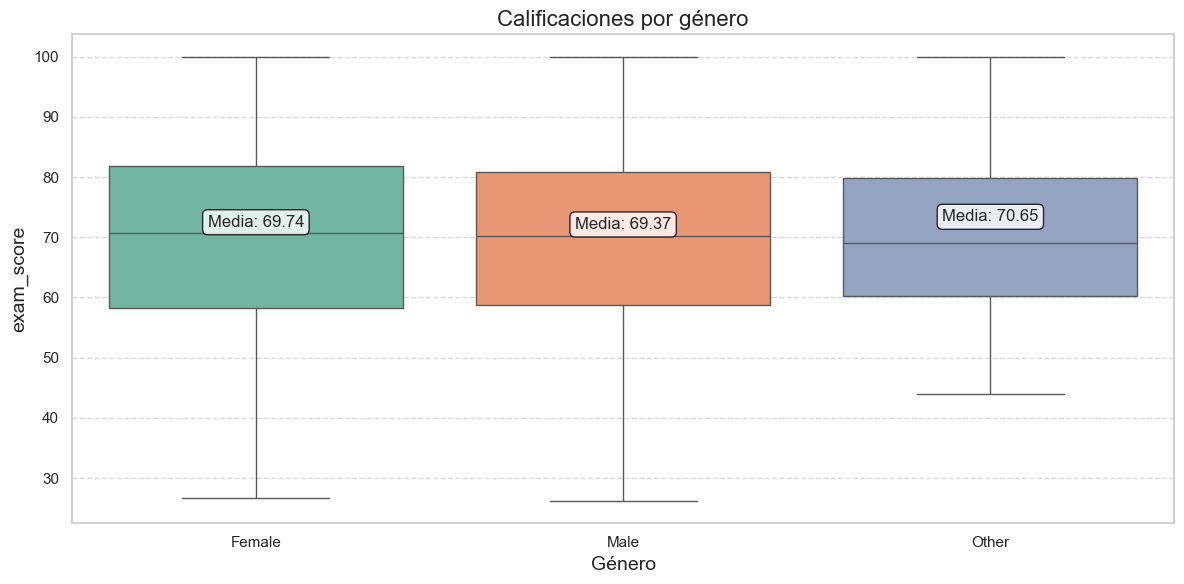

In [60]:
# Crear el gráfico combinado
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='exam_score', data=df, palette='Set2', showfliers=False)  # Boxplot sin outliers

# Añadir títulos y etiquetas
plt.title('Calificaciones por género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('exam_score', fontsize=14)

# Añadir una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, gender in enumerate(df['gender'].unique()):
    # Calcular la media y la desviación estándar
    mean_score = df[df['gender'] == gender]['exam_score'].mean()
    plt.text(i, mean_score + 2, f'Media: {mean_score:.2f}', ha='center',
             bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='black', lw=1, alpha=0.8))

plt.tight_layout()
plt.show()

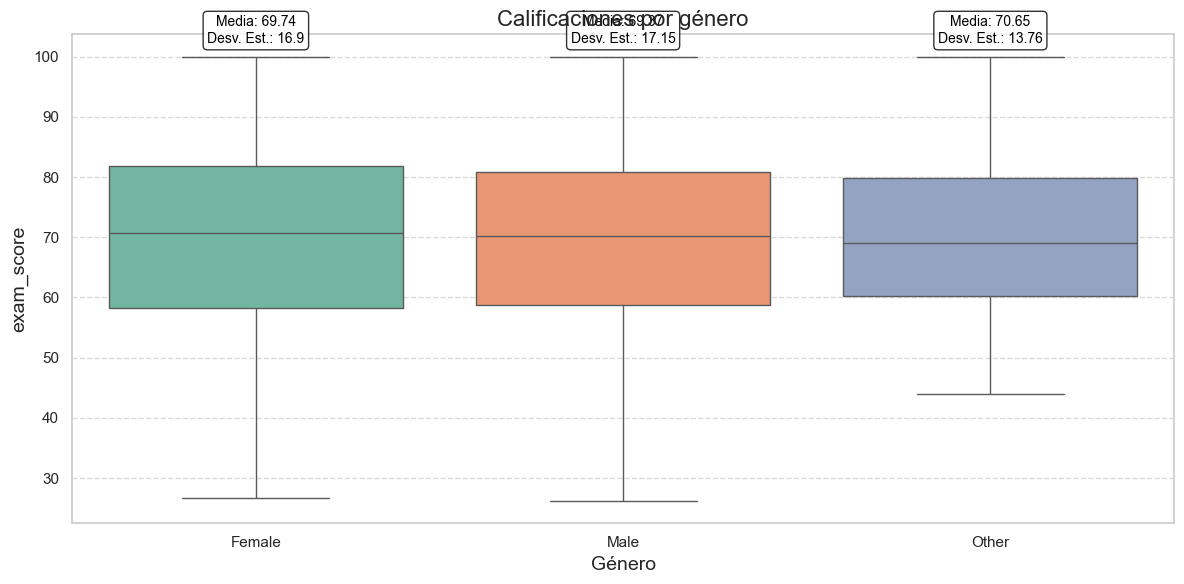

In [62]:
# Crear el gráfico combinado
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='exam_score', data=df, palette='Set2', showfliers=False)  # Boxplot sin outliers

# Añadir títulos y etiquetas
plt.title('Calificaciones por género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('exam_score', fontsize=14)

# Añadir una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

stats_by_gender = df.groupby('gender')['exam_score'].agg(['mean', 'std']).round(2)
for i, gender in enumerate(stats_by_gender.index):
    stats_text = f"Media: {stats_by_gender.loc[gender, "mean"]}\nDesv. Est.: {stats_by_gender.loc[gender, "std"]}"
    plt.annotate(stats_text,
                xy=(i, df['exam_score'].max()),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='black', lw=1, alpha=0.8),
                fontsize=10,
                color='black')


plt.tight_layout()
plt.show()

### Compara calificaciones por trabajo de medio tiempo

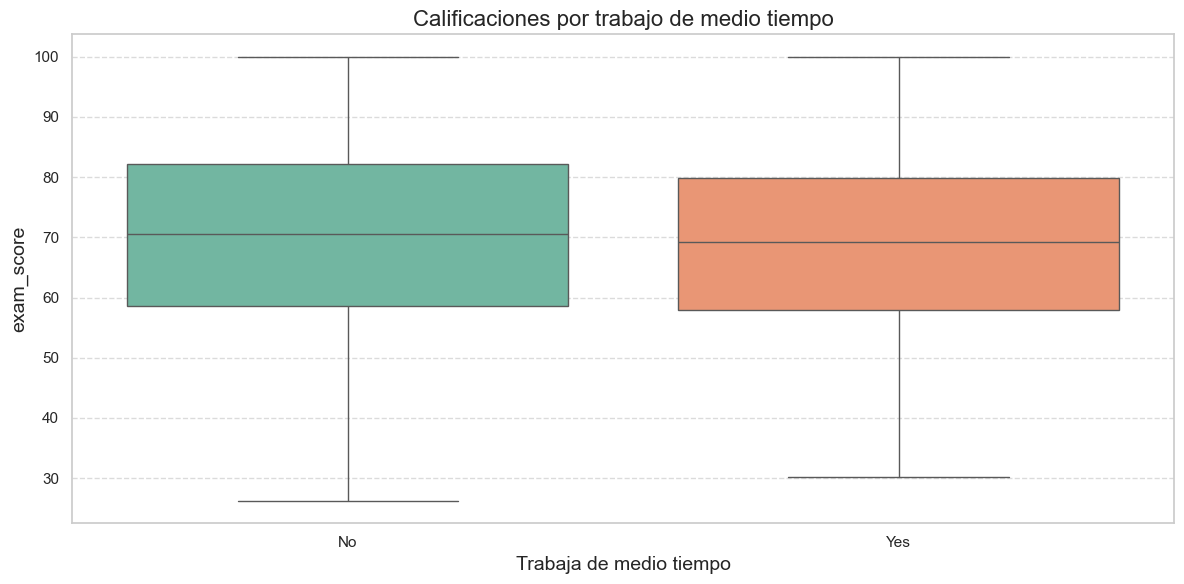

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='part_time_job', y='exam_score', data=df, palette='Set2', showfliers=False)  # Boxplot sin outliers

# Añadir títulos y etiquetas
plt.title('Calificaciones por trabajo de medio tiempo', fontsize=16)
plt.xlabel('Trabaja de medio tiempo', fontsize=14)
plt.ylabel('exam_score', fontsize=14)

# Añadir una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Compara calificaciones por calidad de dieta

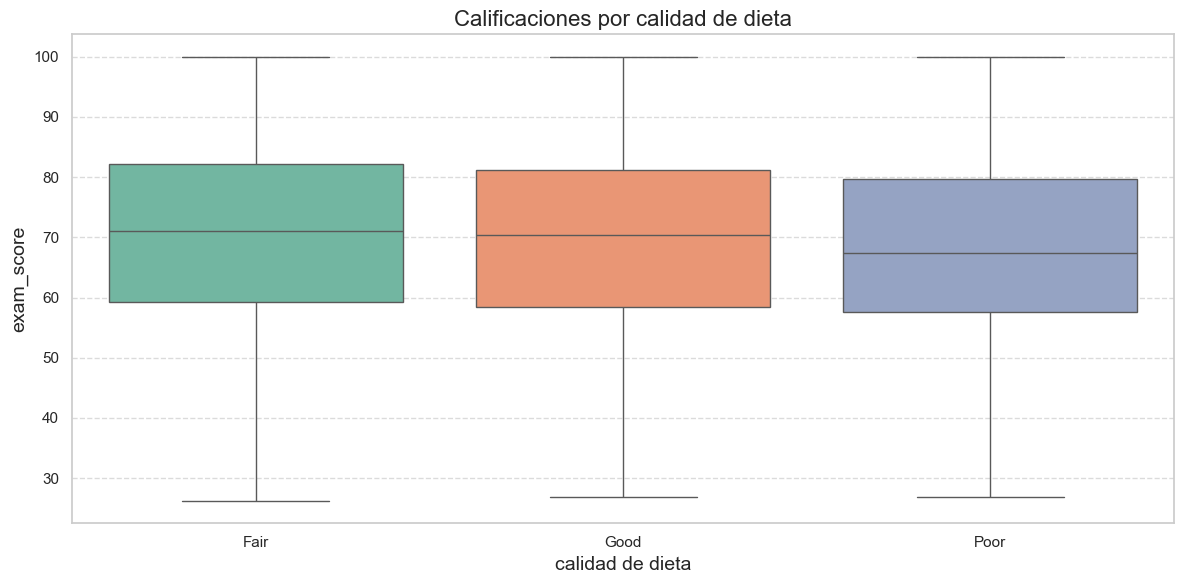

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='diet_quality', y='exam_score', data=df, palette='Set2', showfliers=False)  # Boxplot sin outliers

# Añadir títulos y etiquetas
plt.title('Calificaciones por calidad de dieta', fontsize=16)
plt.xlabel('calidad de dieta', fontsize=14)
plt.ylabel('exam_score', fontsize=14)

# Añadir una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Compara calificaciones por participación extracurricular

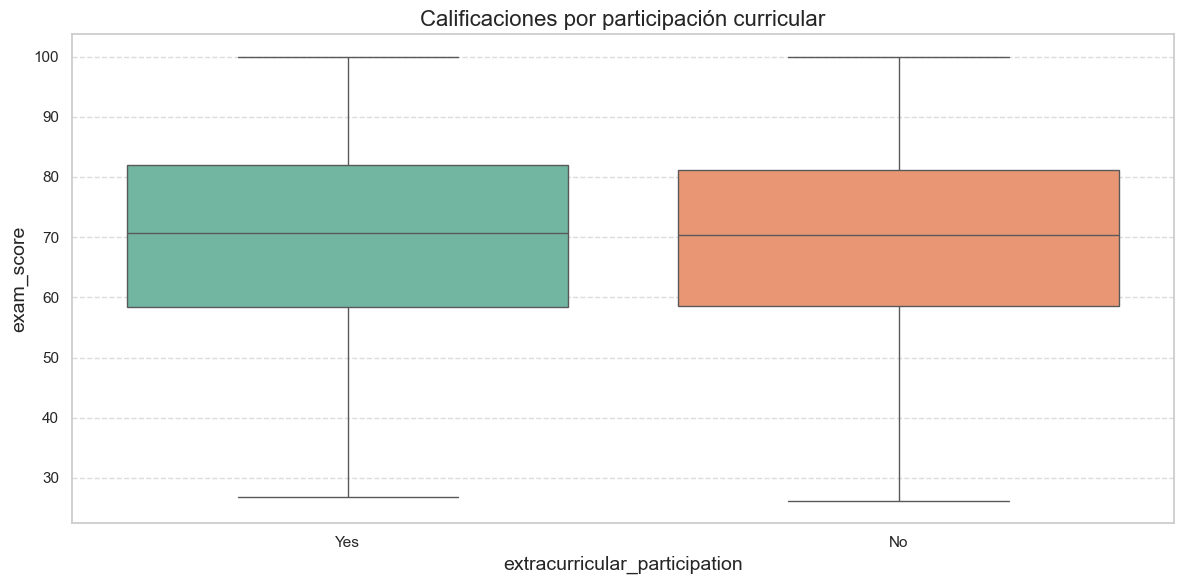

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df, palette='Set2', showfliers=False)  # Boxplot sin outliers

# Añadir títulos y etiquetas
plt.title('Calificaciones por participación curricular', fontsize=16)
plt.xlabel('extracurricular_participation', fontsize=14)
plt.ylabel('exam_score', fontsize=14)

# Añadir una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Axes: >

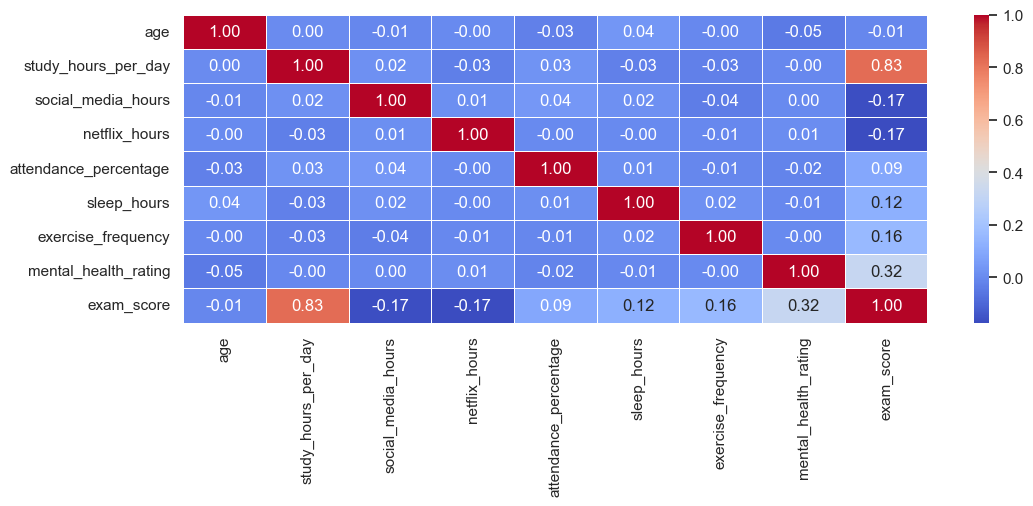

In [66]:
var_num = df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(df[var_num].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Análisis multivariable o multivariado

### Análisis por grupos: calidad de dieta y horas de estudio vs calificaciones

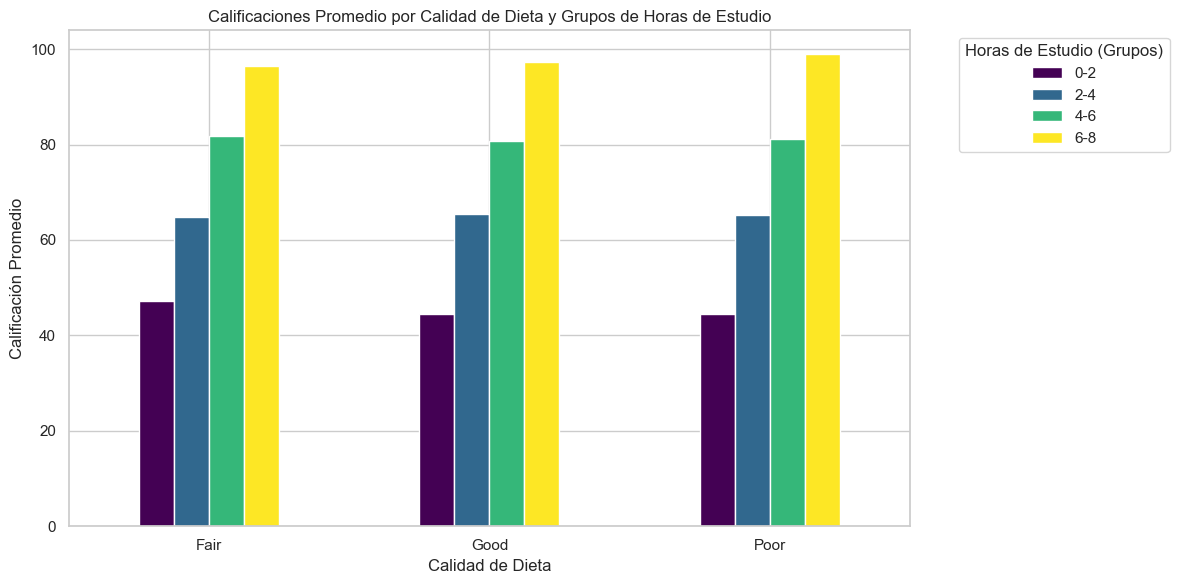

In [88]:
### Analisis por grupos: Calidad de dieta y horas de estudio vs calificaciones
 
# Crear una nueva columna para agrupar las horas de estudio en intervalos
df['study_hours_group'] = pd.cut(df['study_hours_per_day'],
                                 bins=np.arange(0, df['study_hours_per_day'].max() + 1, 2),
                                 right=False,
                                 labels=[f'{i}-{i+2}' for i in range(0, int(df['study_hours_per_day'].max()), 2)])
 
# Calcular la media de calificaciones por calidad de dieta y grupo de horas de estudio
grouped_data = df.groupby(['diet_quality', 'study_hours_group'])['exam_score'].mean().unstack()
 
# Crear gráfico de barras agrupadas
grouped_data.plot(kind='bar', figsize=(12, 6), colormap='viridis')
 
# Configurar etiquetas y título
plt.title('Calificaciones Promedio por Calidad de Dieta y Grupos de Horas de Estudio')
plt.xlabel('Calidad de Dieta')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=0)
plt.legend(title='Horas de Estudio (Grupos)', bbox_to_anchor=(1.05, 1), loc='upper left')
 
plt.tight_layout()
plt.show()

### Análisis por grupos: participación extracurricular y horas de estudio vs calificaciones

In [90]:
# Create an interactive scatter plot
# Create the scatter plot
fig = px.scatter(df,
                 x='study_hours_per_day',
                 y='exam_score',
                 color='extracurricular_participation',
                 hover_data=['student_id', 'age', 'gender', 'mental_health_rating'],
                 title='Análisis por grupos: participación extracurricular y horas de estudio vs calificaciones',
                 labels={
                     'study_hours_per_day': 'Study Hours per Day',
                     'exam_score': 'Exam Score (%)',
                     'extracurricular_participation': 'Extracurricular Participation'
                 },
                 height=600,
                 width=900,
                 trendline="ols"
                )
 
# Calculate correlation
correlation = df['study_hours_per_day'].corr(df['exam_score'])
correlation_text = f'Correlation: {correlation:.2f}'
 
# Update layout for better visibility
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        title=dict(text="Participación extracurricular"),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    annotations=[
        dict(
            x=0.02,
            y=0.98,
            xref="paper",
            yref="paper",
            text=correlation_text,
            showarrow=False,
            font=dict(size=14)
        )
    ],
    font=dict(size=12),
    yaxis_range=[0, 100],
    margin=dict(l=50, r=50, t=80, b=50)
)
 
# Update hover tooltips with percentage format
fig.update_traces(
    marker=dict(size=8),
    hovertemplate="<br>".join([
        "Study Hours: %{x:.1f}",
        "Exam Score: %{y:.1f}%",
        "Education Level: %{color}",
        "<extra></extra>"
    ])
)
 
fig.show()

### Análisis por grupos: horas de sueño, salud mental y calificaciones

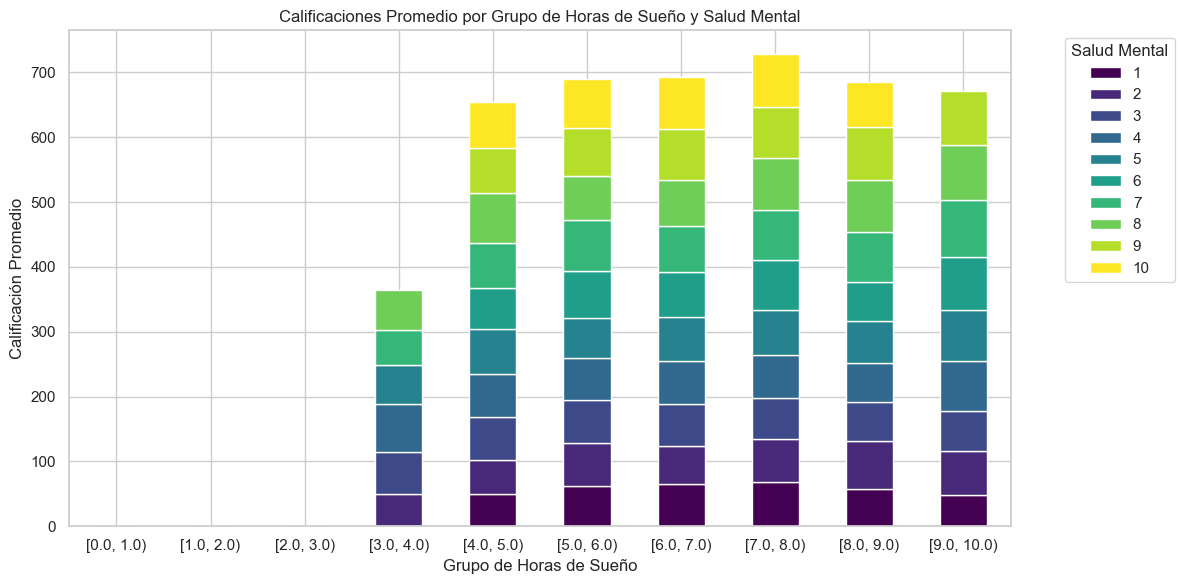

In [92]:
# Crear intervalos para las horas de sueño
df['sleep_hours_group'] = pd.cut(df['sleep_hours'], bins=np.arange(0, df['sleep_hours'].max() + 1, 1), right=False)

# Calcular la media de calificaciones por grupo de horas de sueño y salud mental
grouped_data = df.groupby(['sleep_hours_group', 'mental_health_rating'])['exam_score'].mean().unstack()

# Crear gráfico de barras agrupadas
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Configurar etiquetas y título
plt.title('Calificaciones Promedio por Grupo de Horas de Sueño y Salud Mental')
plt.xlabel('Grupo de Horas de Sueño')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=0)
plt.legend(title='Salud Mental', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()